In [1]:
import warnings


warnings.filterwarnings('ignore')

# lab1

1. Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора.  Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

    调查训练样本量和测试数据量如何影响使用天真贝叶斯分类器对井字棋（tic_tac_toe.txt）和垃圾邮件（spam.csv）数据集的分类准确性。 绘制训练样本和测试样本的准确度依赖性，作为其相关性的函数。


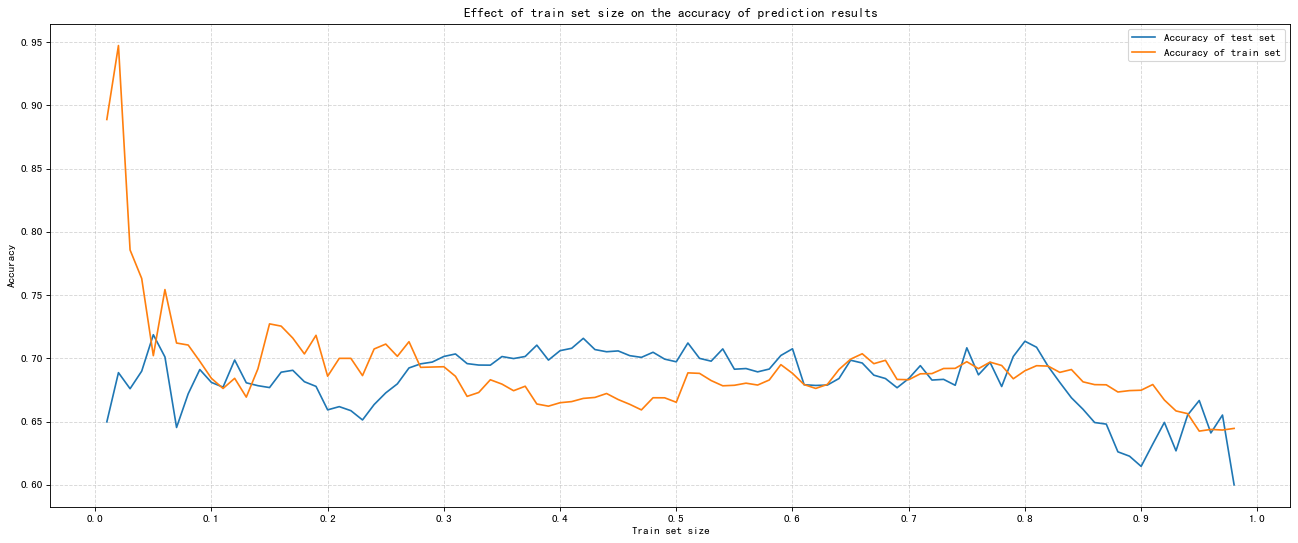

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes
import warnings


warnings.filterwarnings('ignore')


# 读取数据并切分为特征值和目标值
# Считать данные и разделить их на собственные значения и целевые значения
data = pd.read_csv(filepath_or_buffer='./tic_tac_toe.txt')
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

# 转换为机器学习可识别的 int
# Преобразование в распознаваемый машинным обучением int
data_x = pd.DataFrame(data=data_x).replace(to_replace=['o', 'x', 'b'], value=[0, 1, 0.5]).values

# 测试数据集的比例从 1% 到 99%，间隔为 1%
# Тестовый набор данных масштабируется от 1% до 99% с интервалом в 1%.
arr_split = np.arange(start=0.01, stop= 0.99, step=0.01)
arr_test_score = []
arr_train_score = []
for test_size in arr_split:
    # 划分数据集
    # Разделите набор данных
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=(1 - test_size), random_state=90102)

    # 朴素贝叶斯算法估计器
    # Простой байесовский алгоритм оценки
    estimator = naive_bayes.BernoulliNB(alpha=1.0)
    estimator.fit(X=x_train, y=y_train)

    # 模型评估
    # Оценка модели
    test_score = estimator.score(x_test, y_test)
    arr_test_score.append(test_score)

    train_score = estimator.score(x_train, y_train)
    arr_train_score.append(train_score)
    

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_split, arr_test_score, label='Accuracy of test set')
plt.plot(arr_split, arr_train_score, label='Accuracy of train set')
plt.legend()
plt.title('Effect of train set size on the accuracy of prediction results')
plt.xticks(np.arange(start=0, stop=1.1, step=0.1))
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


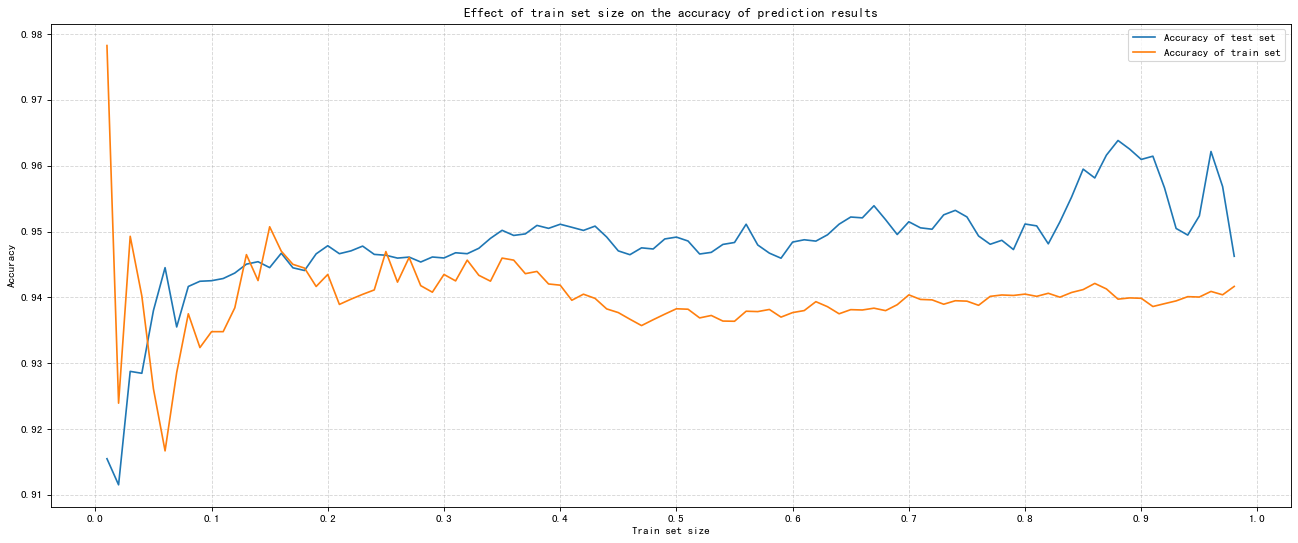

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes
import warnings


warnings.filterwarnings('ignore')

# 读取数据并切分为特征值和目标值
# Считать данные и разделить их на собственные значения и целевые значения
data = pd.read_csv(filepath_or_buffer='./spam.csv')
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

# 测试数据集的比例从 1% 到 99%，间隔为 1%
# Тестовый набор данных масштабируется от 1% до 99% с интервалом в 1%.
arr_split = np.arange(start=0.01, stop= 0.99, step=0.01)
arr_test_score = []
arr_train_score = []
for test_size in arr_split:
    # 划分数据集
    # Разделите набор данных
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=(1 - test_size), random_state=90102)

    # 归一化
    # Нормализация
    transfer = preprocessing.StandardScaler()
    x_train = transfer.fit_transform(X=x_train)
    x_test = transfer.transform(X=x_test)

    # 朴素贝叶斯算法估计器
    # Простой байесовский алгоритм оценки
    estimator = naive_bayes.BernoulliNB(alpha=1.0)
    estimator.fit(X=x_train, y=y_train)

    # 模型评估
    # Оценка модели
    test_score = estimator.score(x_test, y_test)
    arr_test_score.append(test_score)

    train_score = estimator.score(x_train, y_train)
    arr_train_score.append(train_score)
    

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_split, arr_test_score, label='Accuracy of test set')
plt.plot(arr_split, arr_train_score, label='Accuracy of train set')
plt.legend()
plt.title('Effect of train set size on the accuracy of prediction results')
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(start=0, stop=1.1, step=0.1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


2.	Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). Является ли построенный классификатор «хорошим»?

    根据正态分布生成100个具有两个特征X1和X2的点，使其中一部分和另一部分点（类-1和类1）具有参数：数学期望值X1，数学期望值X2，两个变量的标准差，对应于你的变体（在表中标明）。构建图表来说明数据。构建贝叶斯分类器，并使用不同的方法（准确性、误差矩阵、ROC和PR曲线）评估分类的质量。分类器的构造是否 "好"？

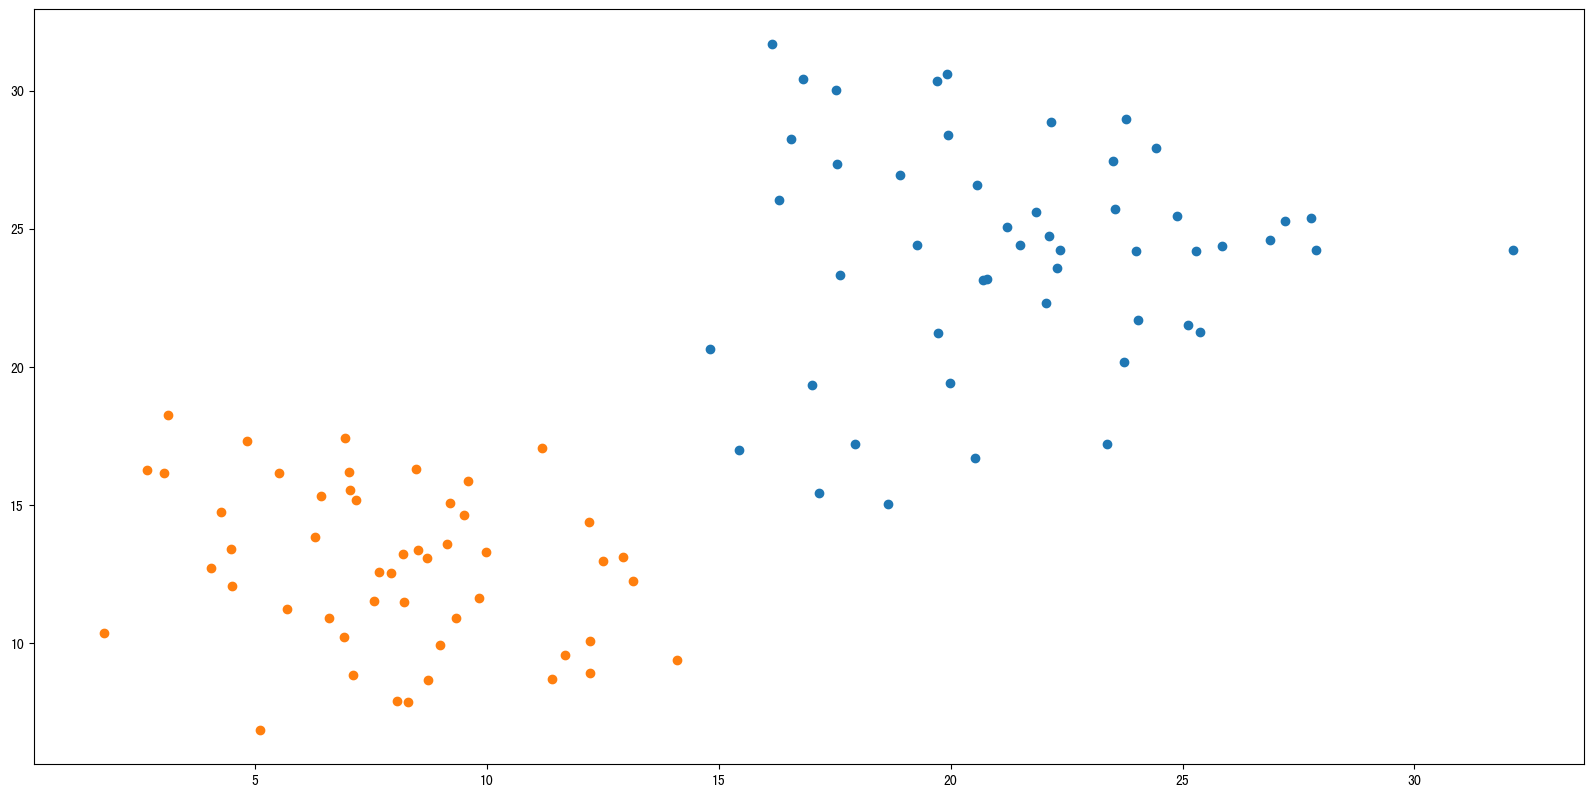

Soure in estimator:  1.0
MSE:  0.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings


warnings.filterwarnings('ignore')

# 获取数据集
x_1_1 = pd.Series(np.random.normal(loc=22, scale=4, size=50), name='x_1_1')
x_1_2 = pd.Series(np.random.normal(loc=24, scale=4, size=50), name='x_1_2')
x_2_1 = pd.Series(np.random.normal(loc=8, scale=3, size=50), name='x_2_1')
x_2_2 = pd.Series(np.random.normal(loc=12, scale=3, size=50), name='x_2_2')
y_1s = pd.Series([1] * 50)
y_f = pd.Series([-1] * 50)

plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x_1_1, x_1_2)
plt.scatter(x_2_1, x_2_2)
plt.show()

train_1 = pd.concat([x_1_1[:40], x_1_2[:40], y_1s[:40]], axis=1)
train_1.columns = ['x_1', 'x_2', 'traget']
train_2 = pd.concat([x_2_1[:40], x_2_2[:40], y_f[:40]], axis=1)
train_2.columns = ['x_1', 'x_2', 'traget']
train = pd.concat([train_1, train_2],  axis=0)
train = shuffle(train).reset_index(drop=True)

test_1 = pd.concat([x_1_1[40:50], x_1_2[40:50], y_1s[40:50]], axis=1)
test_1.columns = ['x_1', 'x_2', 'traget']
test_2 = pd.concat([x_2_1[40:50], x_2_2[40:50], y_f[40:50]], axis=1)
test_2.columns = ['x_1', 'x_2', 'traget']
test = pd.concat([test_1, test_2], axis=0)
test = shuffle(test).reset_index(drop=True)

x_train = train.iloc[:, :2]
x_test = test.iloc[:, :2]
y_train = train.iloc[:, -1:]
y_test = test.iloc[:, -1:]

# 机器学习与预测
estimator = GaussianNB()
estimator.fit(X=x_train, y=y_train)
predict = estimator.predict(X=x_test)

# 模型评估
score = estimator.score(X=x_test, y=y_test)
print('Soure in estimator: ', score)

error_mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict)  # 均方误差
print('MSE: ', error_mse)


Metics:  [[10  0]
 [ 0 10]]
准确率和召回率
:                precision    recall  f1-score   support

    Class -1       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



<Figure size 432x288 with 0 Axes>

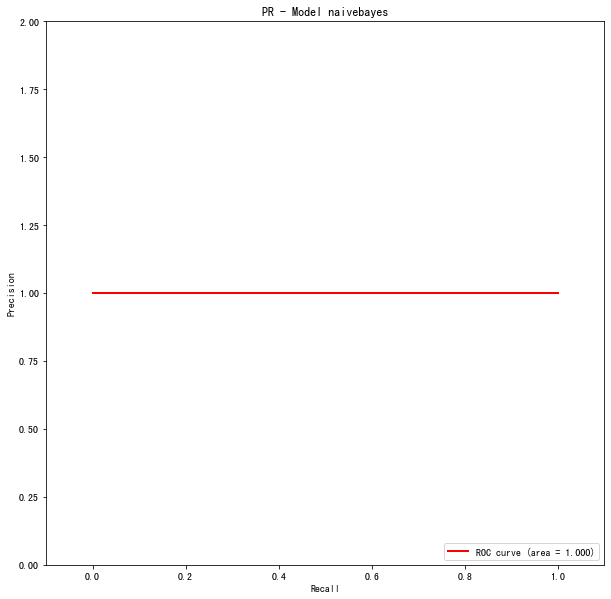

Score ROC:  1.0


<Figure size 432x288 with 0 Axes>

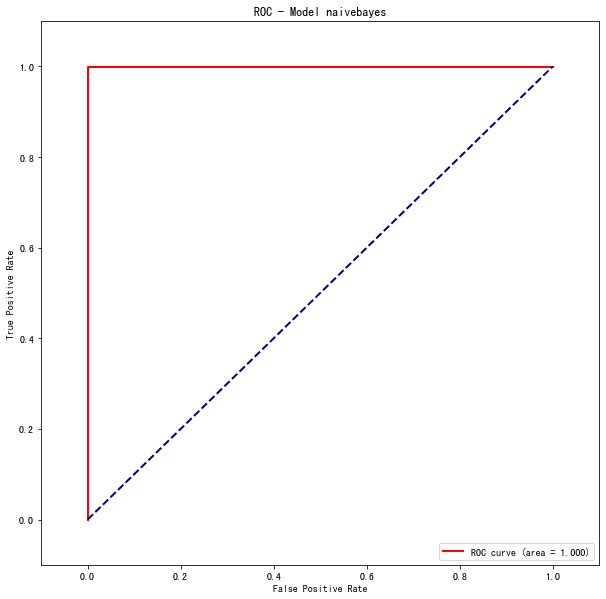

In [8]:
# 误差矩阵
res_matrix = confusion_matrix(y_true=y_test, y_pred=predict)
TP = res_matrix[0, 0]
FN = res_matrix[0, 1]
FP = res_matrix[1, 0]
TN = res_matrix[1, 1]
print('Metics: ', res_matrix)

# 准确率和召回率
score_prec_recall_f1 = metrics.classification_report(y_true=y_test, y_pred=predict, labels=(-1, 1), target_names=('Class -1', 'Class 1'))
print('准确率和召回率\n: ', score_prec_recall_f1)

# 绘制 P-R 曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot([0, TP / (TP + FP)], [TP / (TP + FN), 1], color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % (TP / (TP + FP)))  # 假正率为横坐标，真正率为纵坐标做曲线
plt.xlim([-0.1, 1.1])
plt.ylim([0, 2])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR - Model naivebayes')
plt.legend(loc="lower right")
plt.show()

# FPR 和 TPR
y_test_01 = np.where(y_test['traget'] == 1, 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test_01, y_score=predict)
score_auc = metrics.auc(x=fpr, y=tpr)
print('Score ROC: ', score_auc)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % score_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Model naivebayes')
plt.legend(loc="lower right")
plt.show()


---

3.	Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. 

    a.	Постройте графики зависимости ошибки классификации от количества ближайших соседей.

    b.	Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет на точность классификации.

    c.	Определите, к какому типу стекла относится экземпляр с характеристиками:
    RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1



    为Glass训练集（glass.csv）建立一个基于k近邻法的分类器。看一下特征和类别的标题。在构建分类器之前，还要删除第一个特征Id号，它不带有任何信息负载。

    a.	绘制分类误差与近邻数量的函数。

    b.	确定合适的距离度量，研究距离度量的类型如何影响分类精度。

    c.	确定标本属于哪种类型的玻璃。

    RI=1.516 Na=11.7 Mg=1.01 Al=1.19 Si=72.59 K=0.43 Ca=11.44 Ba=0.02 Fe=0.1

Metric:  euclidean 	Best score is:  0.7037037037037037
Metric:  manhattan 	Best score is:  0.7407407407407407
Metric:  chebyshev 	Best score is:  0.6481481481481481
Metric:  minkowski 	Best score is:  0.7037037037037037


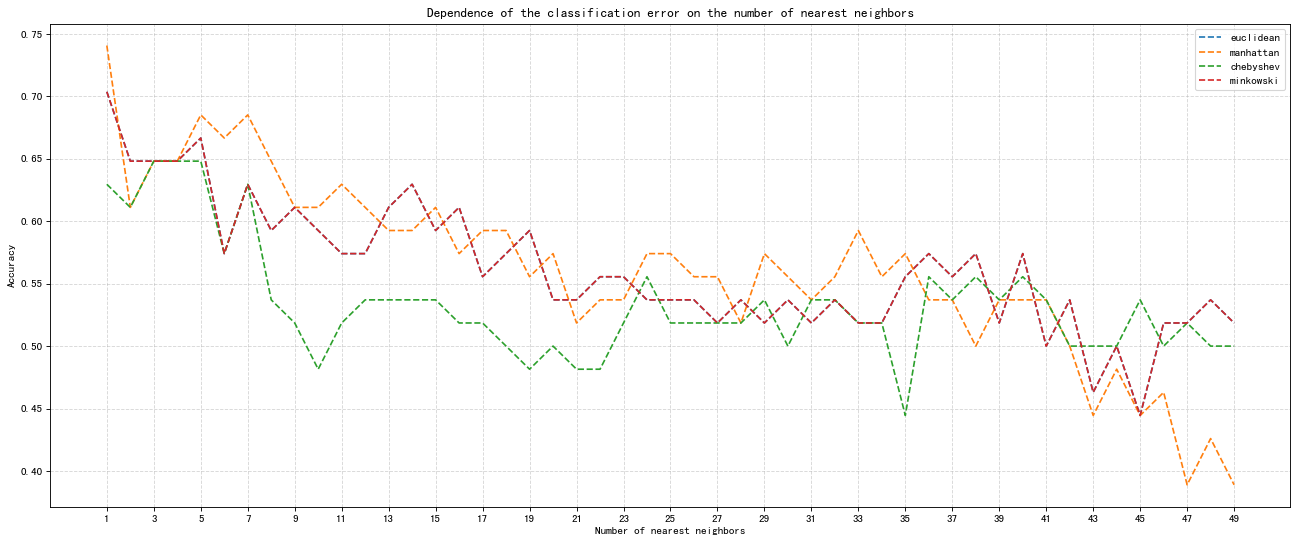

Predict:  [5]


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. 读取数据
# 1. чтение данных
data = pd.read_csv(filepath_or_buffer='./glass.csv')
data_x = data.iloc[:, 1:-1]
data_y = data.iloc[:, -1:]

# 2. 划分数据集
# 2. разграничить набор данных
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25 , random_state=90102)

# 3. 归一化
# 3. нормализация
transfer = MinMaxScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 4. 绘制分类误差与近邻数量的函数
# 4. Постройте графики зависимости ошибки классификации от количества ближайших соседей
arr_n_neighbors = range(1, 50)
arr_metric = ('euclidean', 'manhattan', 'chebyshev', 'minkowski')
best_estimator = None
best_score = 0
plt.figure(figsize=(20, 8), dpi=80)
for this_metric in arr_metric:
    arr_score_n_nerghbors = []
    for n in arr_n_neighbors:
        estimator = KNeighborsClassifier(n_neighbors=n, metric=this_metric)
        estimator.fit(X=x_train, y=y_train)
        score = estimator.score(X=x_test, y=y_test)
        arr_score_n_nerghbors.append(score)

        # 5. 最佳准确率及最佳估计器
        # 5. лучшая точность и лучший модель
        if score > best_score:
            best_score = score
            best_estimator = estimator

    print('Metric: ', this_metric, '\tBest score is: ', max(arr_score_n_nerghbors))
    plt.plot(arr_n_neighbors, arr_score_n_nerghbors, linestyle='--', label=this_metric)

plt.legend()
plt.title('Dependence of the classification error on the number of nearest neighbors')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')
plt.xticks(arr_n_neighbors[::2])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 5. 使用上面求得的最佳估计器模型进行预测
# 5. использовать лучшую модель, полученную выше, для прогнозирования
data_predict = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]
data_predict = transfer.transform(data_predict)
predict = best_estimator.predict(X=data_predict)
print('Predict: ', predict)

---

4.	Постройте классификаторы на основе метода опорных векторов для наборов данных из файлов svmdataN.txt и svmdataNtest.txt, где N –  индекс задания:

    a.	Постройте алгоритм метода опорных векторов с линейным ядром. Визуализируйте разбиение пространства признаков на области с помощью полученной модели (пример визуализации). Выведите количество полученных опорных векторов, а также матрицу ошибок классификации на обучающей и тестовой выборках.

为来自svmdataN.txt和svmdataNtest.txt文件的数据集建立基于参考向量法的分类器，其中N为工作索引。

a.	构建一个具有线性核的支持向量法算法。使用所产生的模型将特征空间划分为区域的情况可视化（可视化示例）。输出获得的参考向量的数量，以及训练和测试样本的分类误差矩阵。


In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_a.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_a_test.txt', sep='\t')

# Split datasets
x_train = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y_train = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# Extimator (linear kernel)
estimator = svm.SVC(kernel='linear', C=1.0)
estimator.fit(X=x_train, y=y_train)
predict = estimator.predict(X=x_test)
score = estimator.score(X=x_test, y=y_test)
print('Score: ', score)

# Confusion matrix
conf_metrix = metrics.confusion_matrix(y_true=y_test, y_pred=predict)
print('Confusion matrix:\n', conf_metrix)

# w and b
arr_w = estimator.coef_
arr_b = estimator.intercept_
print('Coef: ', arr_w)
print('Intercept: ', arr_b)

Score:  1.0
Confusion matrix:
 [[20  0]
 [ 0 20]]
Coef:  [[1.50127222 1.22347712]]
Intercept:  [-1.31613027]


In [69]:
# get the separating hyperplane
w = estimator.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-0.7, 1.2)
yy = a * xx - (estimator.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = estimator.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = estimator.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

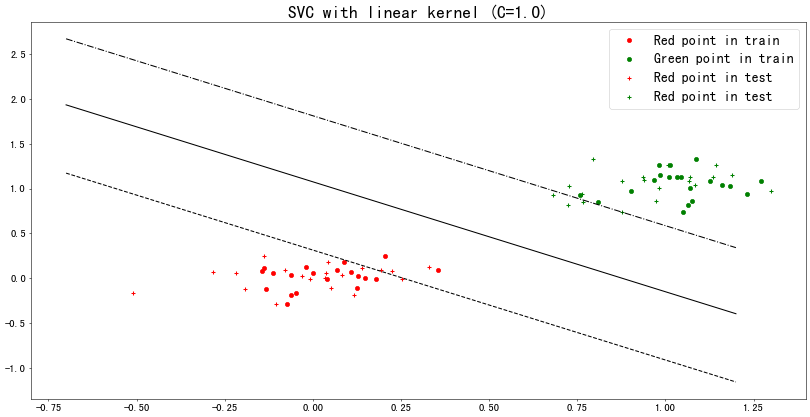

In [81]:
plt.figure(figsize=(20, 10), dpi=50)
plt.scatter(x=data_train.query("Color == 'red'")['X1'], y=data_test.query("Color == 'red'")['X2'], c='r', label='Red point in train')
plt.scatter(x=data_train.query("Color == 'green'")['X1'], y=data_test.query("Color == 'green'")['X2'], c='g', label='Green point in train')
plt.scatter(x=data_test.query("Color == 'red'")['X1'], y=data_test.query("Color == 'red'")['X2'], c='r', marker='+', label='Red point in test')
plt.scatter(x=data_test.query("Color == 'green'")['X1'], y=data_test.query("Color == 'green'")['X2'], c='g', marker='+', label='Red point in test')
plt.legend(fontsize=20)
# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k-.')
plt.title('SVC with linear kernel (C=1.0)', fontsize=25)
plt.tick_params(labelsize=15)
plt.show()

---

c.	Постройте алгоритм метода опорных векторов, используя различные ядра (линейное, полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

c.	使用不同的核（线性、1-5次方的多项式、西格玛函数、高斯）构建一个参考向量法的算法。利用获得的模型将特征空间划分为多个区域进行可视化。得出结论。

d.	Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

d.	使用不同的核（1-5次方的多项式、正弦函数、高斯）构建一个支持向量方法算法。利用所得到的模型将特征空间划分为多个区域，实现可视化。得出结论。

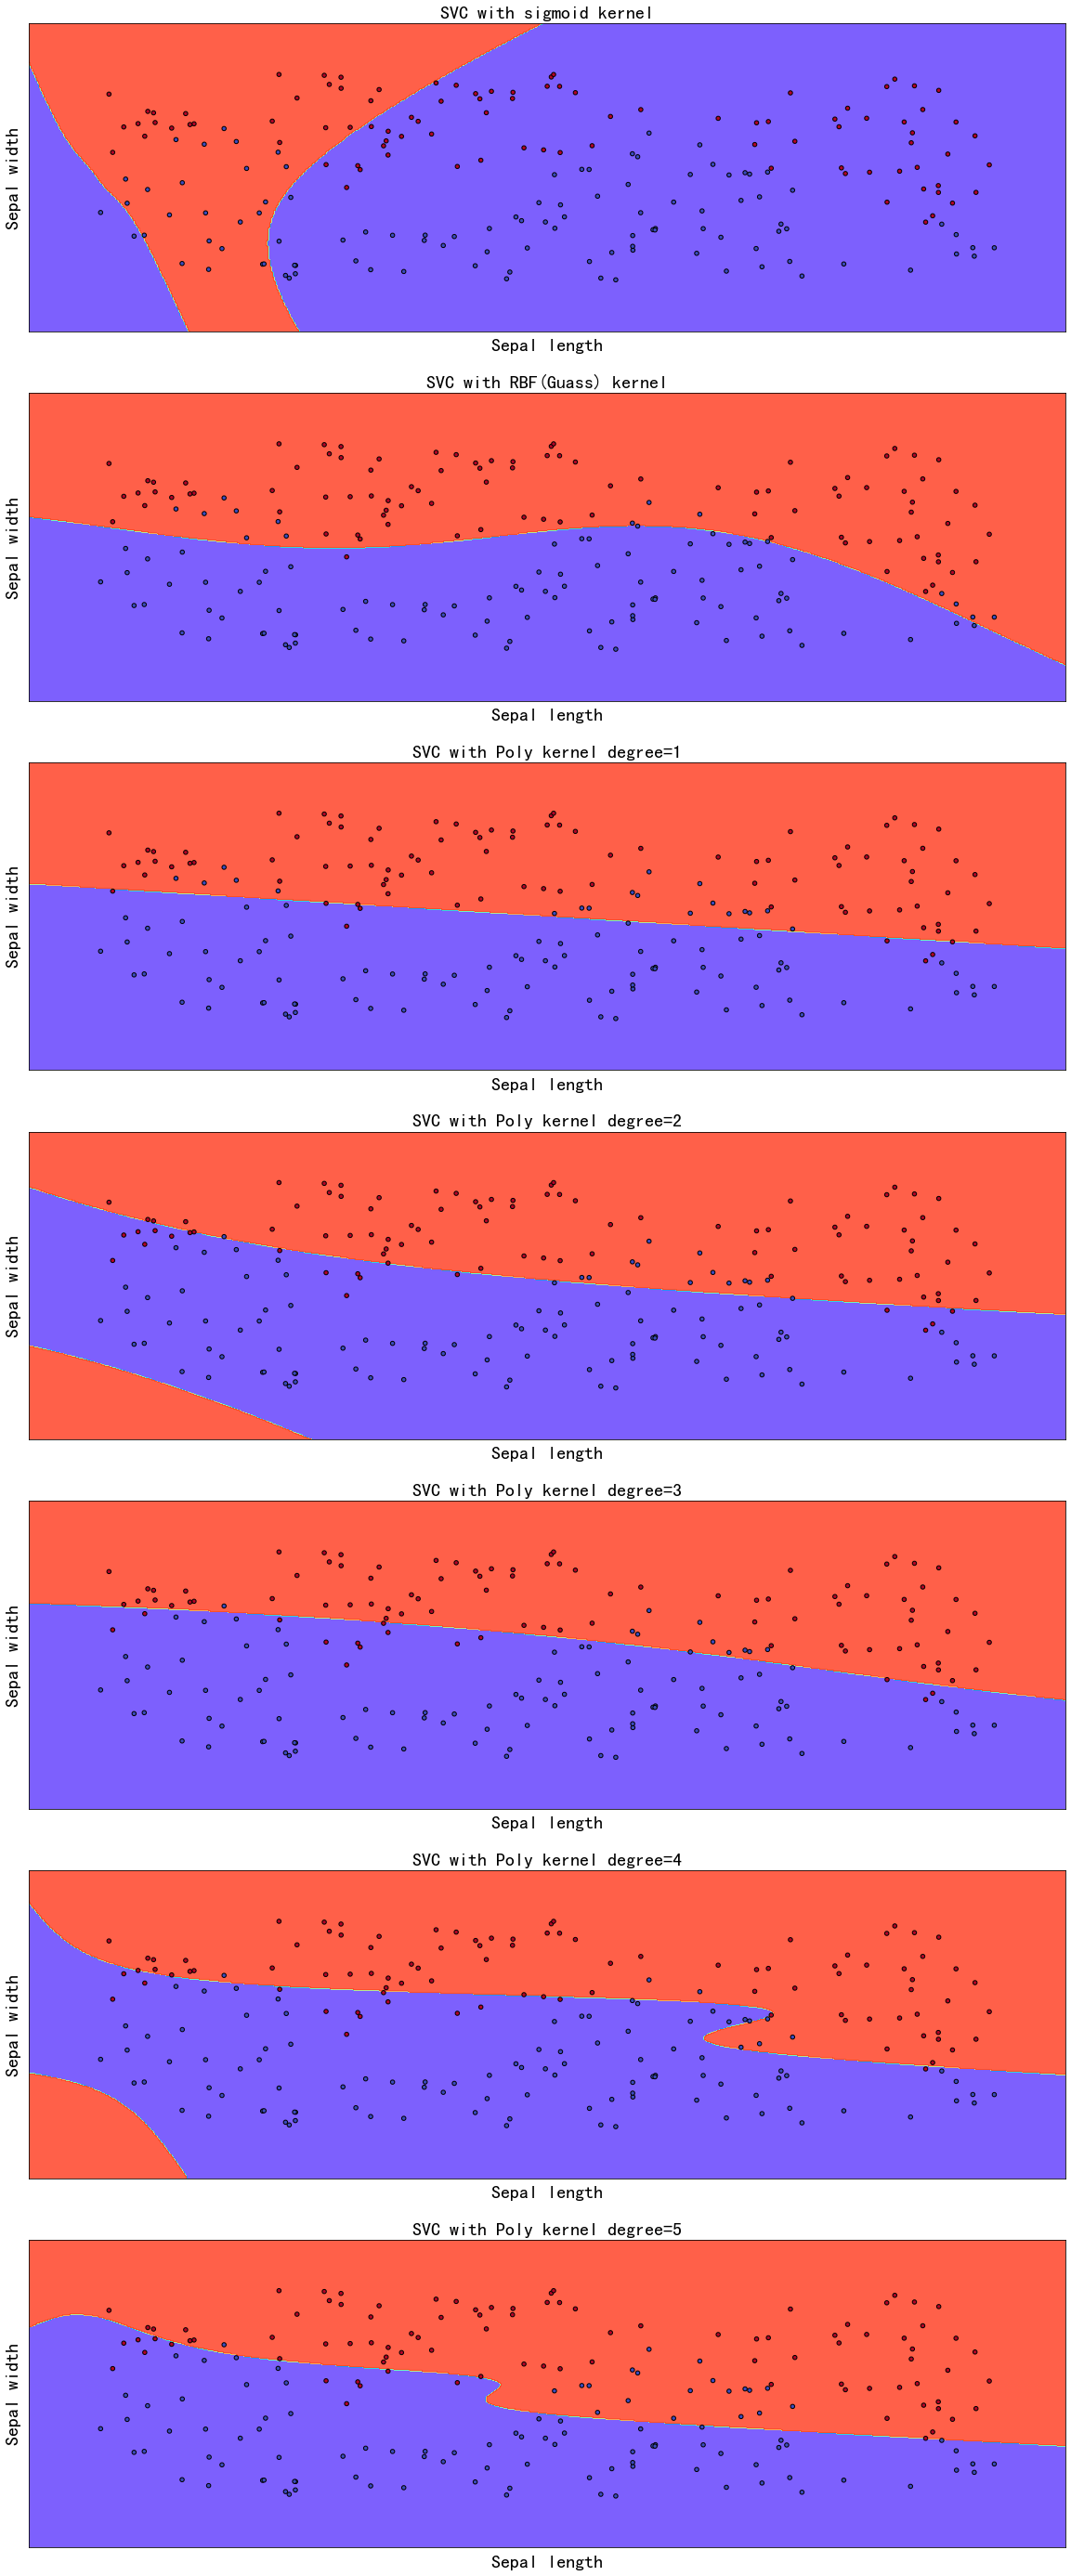

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    创建一个网状的点来绘制在

    Parameters
    ----------
    x: data to base x-axis meshgrid on 以X轴网格为基础的数据
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional 网格的步长，可选

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    绘制一个分类器的决策边界

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# ------------------------------------------------------------------------------------
# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_d.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_d_test.txt', sep='\t')

# Split datasets
X = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='sigmoid', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', degree=3, C=C),
          svm.SVC(kernel='poly',degree=1, gamma='auto', C=C),
          svm.SVC(kernel='poly',degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly',degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly',degree=4, gamma='auto', C=C),
          svm.SVC(kernel='poly',degree=5, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with sigmoid kernel',
          'SVC with RBF(Guass) kernel',
          'SVC with Poly kernel degree=1',
          'SVC with Poly kernel degree=2',
          'SVC with Poly kernel degree=3',
          'SVC with Poly kernel degree=4',
          'SVC with Poly kernel degree=5')

# Set-up 8x1 grid for plotting.
fig, sub = plt.subplots(7, 1, figsize=(20, 50))
plt.subplots_adjust(hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #画出预测结果
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    #把原始点画上去                  
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=20)
    ax.set_ylabel('Sepal width', fontsize=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=20)

plt.show()


e.	Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Изменяя значение параметра ядра (гамма), продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.

e.	使用不同的核（1-5次方的多项式、正弦函数、高斯）构建一个支持向量方法算法。通过改变内核参数（gamma）的值，展示过度训练的效果，同时将特征空间划分为多个区域的情况可视化。

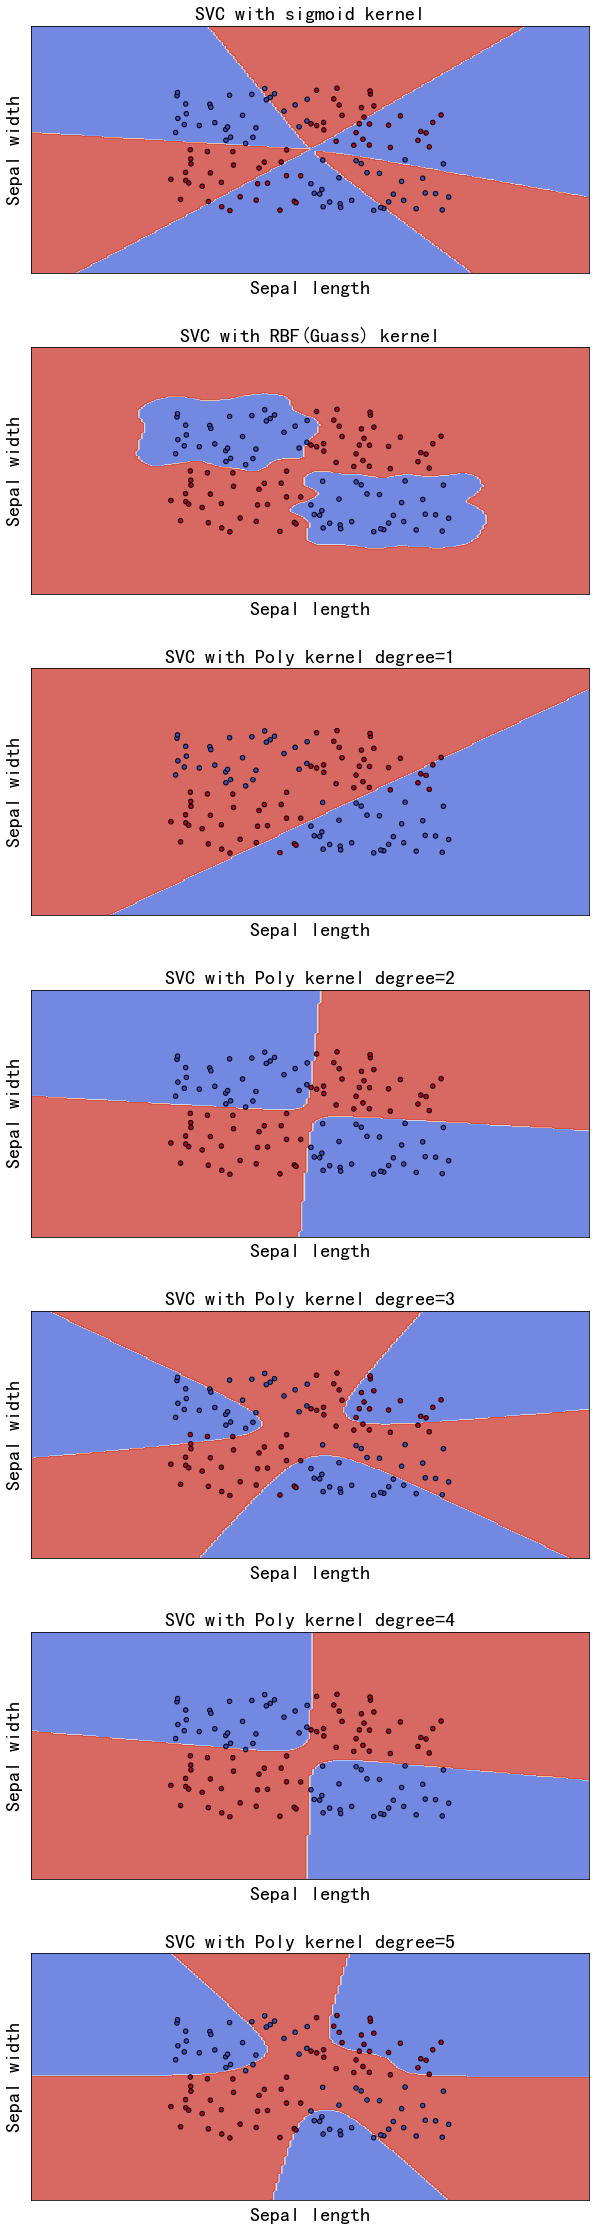

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    创建一个网状的点来绘制在

    Parameters
    ----------
    x: data to base x-axis meshgrid on 以X轴网格为基础的数据
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional 网格的步长，可选

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    绘制一个分类器的决策边界

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# ------------------------------------------------------------------------------------
# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_e.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_e_test.txt', sep='\t')

# Split datasets
X = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
gamma=50
models = (svm.SVC(kernel='sigmoid', gamma=gamma, C=C),
          svm.SVC(kernel='rbf', degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=1, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=2, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=4, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=5, gamma=gamma, C=C),)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with sigmoid kernel',
          'SVC with RBF(Guass) kernel',
          'SVC with Poly kernel degree=1',
          'SVC with Poly kernel degree=2',
          'SVC with Poly kernel degree=3',
          'SVC with Poly kernel degree=4',
          'SVC with Poly kernel degree=5')

# Set-up 8x1 grid for plotting.
fig, sub = plt.subplots(7, 1, figsize=(10, 40))
plt.subplots_adjust(hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #画出预测结果
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    #把原始点画上去                  
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=20)
    ax.set_ylabel('Sepal width', fontsize=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=20)

plt.show()


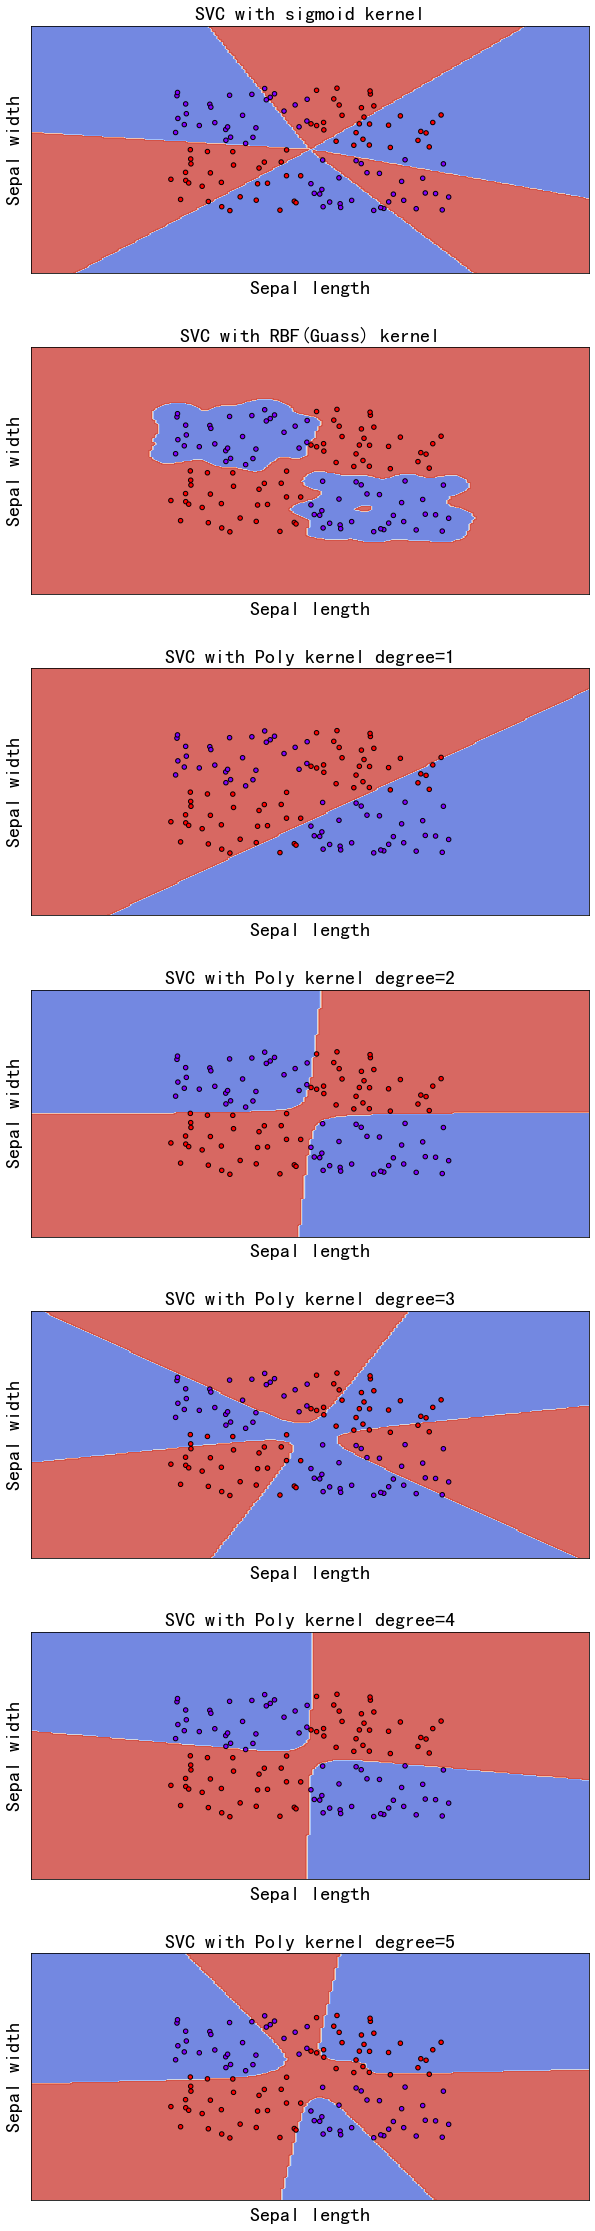

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    创建一个网状的点来绘制在

    Parameters
    ----------
    x: data to base x-axis meshgrid on 以X轴网格为基础的数据
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional 网格的步长，可选

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    绘制一个分类器的决策边界

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# ------------------------------------------------------------------------------------
# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_e.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_e_test.txt', sep='\t')

# Split datasets
X = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
gamma=100
models = (svm.SVC(kernel='sigmoid', gamma=gamma, C=C),
          svm.SVC(kernel='rbf', degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=1, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=2, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=4, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=5, gamma=gamma, C=C),)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with sigmoid kernel',
          'SVC with RBF(Guass) kernel',
          'SVC with Poly kernel degree=1',
          'SVC with Poly kernel degree=2',
          'SVC with Poly kernel degree=3',
          'SVC with Poly kernel degree=4',
          'SVC with Poly kernel degree=5')

# Set-up 8x1 grid for plotting.
fig, sub = plt.subplots(7, 1, figsize=(10, 40))
plt.subplots_adjust(hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #画出预测结果
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    #把原始点画上去                  
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=20)
    ax.set_ylabel('Sepal width', fontsize=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=20)

plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    创建一个网状的点来绘制在

    Parameters
    ----------
    x: data to base x-axis meshgrid on 以X轴网格为基础的数据
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional 网格的步长，可选

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    绘制一个分类器的决策边界

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# ------------------------------------------------------------------------------------
# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_e.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_e_test.txt', sep='\t')

# Split datasets
X = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
gamma=500
models = (svm.SVC(kernel='sigmoid', gamma=gamma, C=C),
          svm.SVC(kernel='rbf', degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=1, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=2, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=4, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=5, gamma=gamma, C=C),)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with sigmoid kernel',
          'SVC with RBF(Guass) kernel',
          'SVC with Poly kernel degree=1',
          'SVC with Poly kernel degree=2',
          'SVC with Poly kernel degree=3',
          'SVC with Poly kernel degree=4',
          'SVC with Poly kernel degree=5')

# Set-up 8x1 grid for plotting.
fig, sub = plt.subplots(7, 1, figsize=(10, 40))
plt.subplots_adjust(hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #画出预测结果
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    #把原始点画上去                  
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=20)
    ax.set_ylabel('Sepal width', fontsize=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=20)

plt.show()


KeyboardInterrupt: 

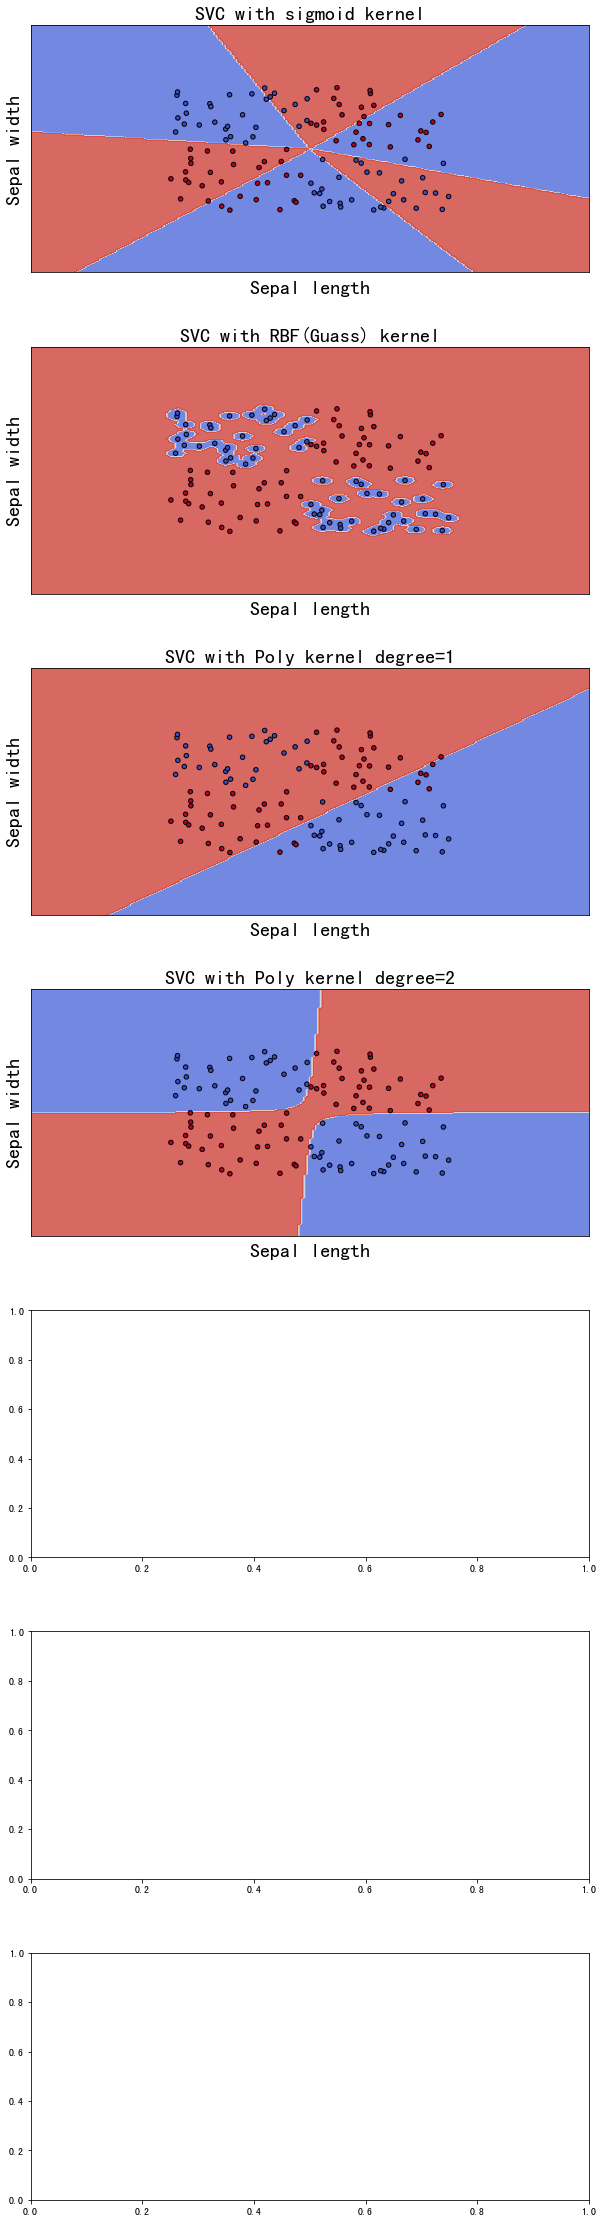

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    创建一个网状的点来绘制在

    Parameters
    ----------
    x: data to base x-axis meshgrid on 以X轴网格为基础的数据
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional 网格的步长，可选

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    绘制一个分类器的决策边界

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# ------------------------------------------------------------------------------------
# Get dataset
data_train = pd.read_csv(filepath_or_buffer='./svmdata_e.txt', sep='\t')
data_test = pd.read_csv(filepath_or_buffer='./svmdata_e_test.txt', sep='\t')

# Split datasets
X = data_train.iloc[:, :-1].values
x_test = data_test.iloc[:, :-1].values
y = data_train.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values
y_test = data_test.iloc[:, -1:].replace(to_replace=['red', 'green'], value=[0, 1]).values

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
gamma=1000
models = (svm.SVC(kernel='sigmoid', gamma=gamma, C=C),
          svm.SVC(kernel='rbf', degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=1, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=2, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=3, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=4, gamma=gamma, C=C),
          svm.SVC(kernel='poly',degree=5, gamma=gamma, C=C),)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with sigmoid kernel',
          'SVC with RBF(Guass) kernel',
          'SVC with Poly kernel degree=1',
          'SVC with Poly kernel degree=2',
          'SVC with Poly kernel degree=3',
          'SVC with Poly kernel degree=4',
          'SVC with Poly kernel degree=5')

# Set-up 8x1 grid for plotting.
fig, sub = plt.subplots(7, 1, figsize=(10, 40))
plt.subplots_adjust(hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #画出预测结果
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    #把原始点画上去                  
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=20)
    ax.set_ylabel('Sepal width', fontsize=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=20)

plt.show()


---
5.	Постройте классификаторы для различных данных на основе деревьев решений:

    a.	Загрузите набор данных Glass из файла glass.csv.
    Постройте дерево классификации для модели, предсказывающей тип (Type) по остальным признакам. Визуализируйте результирующее дерево решения. Дайте интерпретацию полученным результатам. Является ли построенное дерево избыточным? Исследуйте зависимость точности классификации от критерия расщепления, максимальной глубины дерева и других параметров по вашему усмотрению.

    b.	Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.


为不同的数据构建基于决策树的分类器。

    a. 从glass.csv文件中加载Glass数据集。
    为模型构建一个分类树，从其余的特征中预测类型（Type）。将产生的决策树可视化。对结果作出解释。这棵树是多余的吗？研究分类精度对分割标准、树的最大深度和其他参数的依赖性，由你决定。

    b. 从spam7.csv文件中加载spam7数据集。构建参数yesno的最佳分类树。 解释如何选择参数。将产生的决策树可视化。识别最具影响力的特征。评估分类的质量。




Source score:  0.6481481481481481


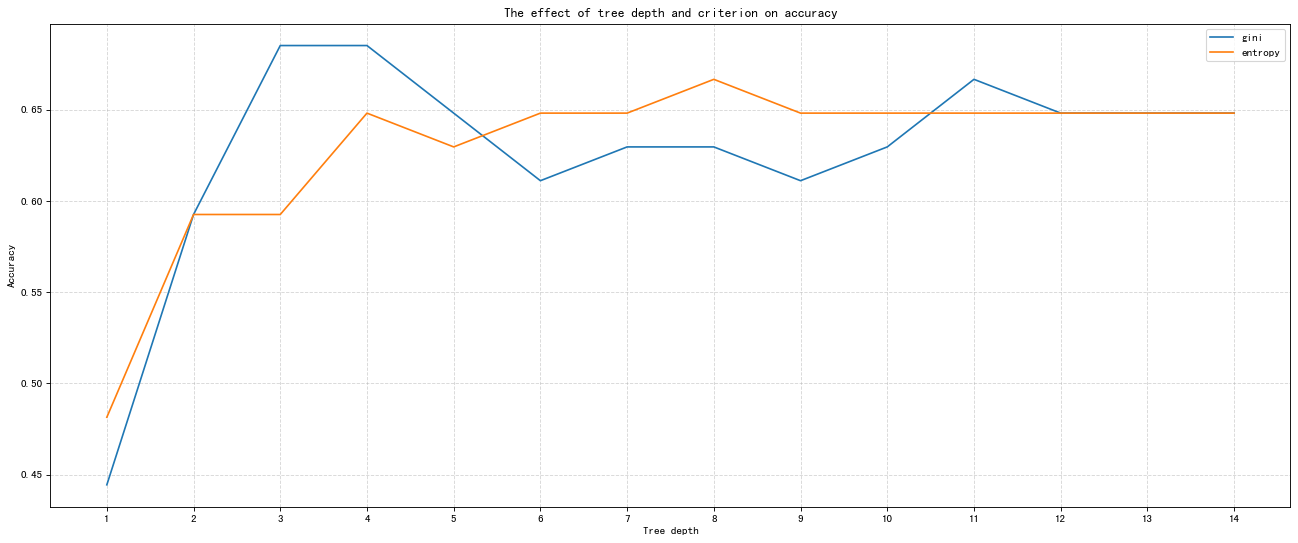

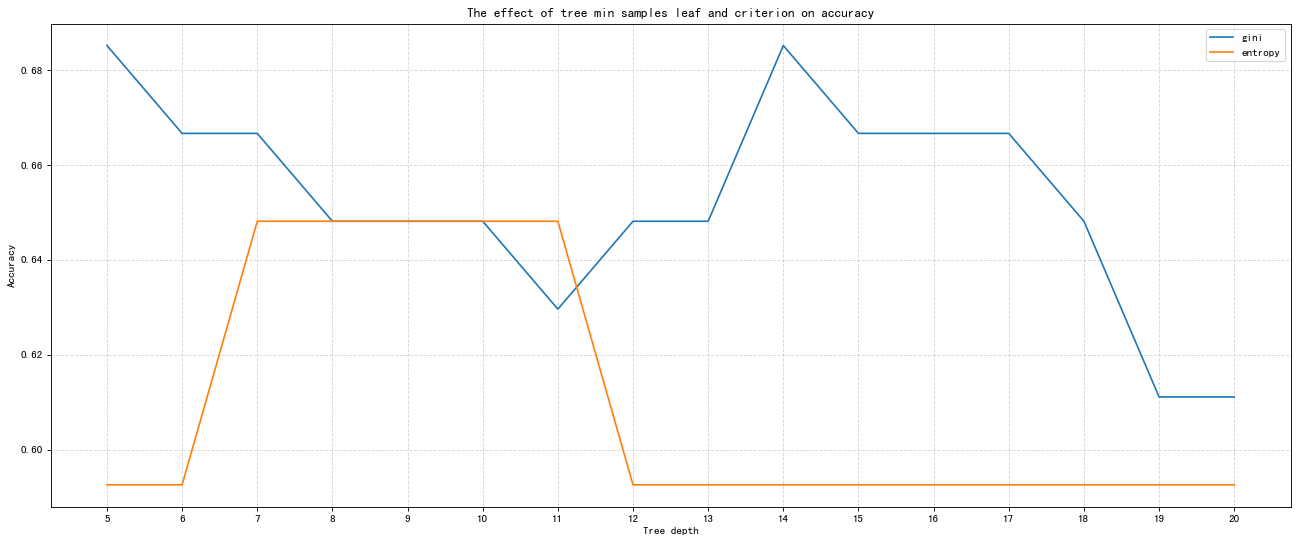

Score:  0.6851851851851852
Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8}
Best estimator: DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=90102)
Best Score on train: 0.73125
Result CV: {'mean_fit_time': array([0.00079236, 0.00082366, 0.00076036, 0.00074537, 0.00075009,
       0.00075183, 0.00077453, 0.00074148, 0.00076466, 0.00076001,
       0.00075791, 0.00079868, 0.00077751, 0.00081885, 0.00074878,
       0.0007232 , 0.00078166, 0.00077868, 0.00092242, 0.00081475,
       0.00079381, 0.00077224, 0.0007652 , 0.00076683, 0.00076647,
       0.00076077, 0.0008935 , 0.00090668, 0.00089788, 0.00082695,
       0.00084682, 0.00077059, 0.00106235, 0.00101235, 0.00094008,
       0.00082731, 0.00084686, 0.00081968, 0.00081136, 0.00081127,
       0.00080695, 0.00080223, 0.00082181, 0.00081115, 0.00080423,
       0.00082741, 0.00096211, 0.00088449, 0.00090432, 0.00095642,
       0.00091608, 0.00087311, 0.00090814, 0.0008935 , 0.00083783,
       0.000

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

# 导入数据集
# Импортированные наборы данных
data = pd.read_csv(filepath_or_buffer='glass.csv')
data_x = data.iloc[:, 1:-1]
data_y = data.iloc[:, -1:]

# 划分数据集
# Разделите набор данных
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=90102)

# 在没有做任何优化下的决策树样式
# Стиль дерева решений без какой-либо оптимизации
estimator = DecisionTreeClassifier(criterion='gini', random_state=90102)
estimator.fit(X=x_train, y=y_train)
print('Source score: ', estimator.score(X=x_test, y=y_test))
export_graphviz(estimator, out_file='./result/source_glass_tree.dot', feature_names=data_x.columns)

arr_score_gini_depth = []
arr_score_entropy_depth = []
arr_depth = range(1, 15)
# 探究树的深度对准确率的影响
# Исследование влияния глубины дерева на точность
for depth in arr_depth:
    # 决策树预估器
    # Прогностическое дерево решений
    estimator = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth, random_state=90102)
    estimator.fit(X=x_train, y=y_train)
    arr_score_gini_depth.append(estimator.score(X=x_test, y=y_test))

    estimator = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=depth, random_state=90102)
    estimator.fit(X=x_train, y=y_train)
    arr_score_entropy_depth.append(estimator.score(X=x_test, y=y_test))

# 将结果绘制
# Построить график результатов
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_depth, arr_score_gini_depth, label='gini')
plt.plot(arr_depth, arr_score_entropy_depth, label='entropy')
plt.legend()
plt.title('The effect of tree depth and criterion on accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.xticks(arr_depth)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

arr_score_gini_leaf = []
arr_score_entropy_leaf = []
arr_leaf = range(5, 21)
# 探究最小叶子数量对准确率的影响
# Исследуйте влияние минимального количества листьев на точность
for leaf in arr_leaf:
    # 决策树预估器
    # Прогностическое дерево решений
    estimator = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=leaf, random_state=90102)
    estimator.fit(X=x_train, y=y_train)
    arr_score_gini_leaf.append(estimator.score(X=x_test, y=y_test))

    estimator = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf=leaf, random_state=90102)
    estimator.fit(X=x_train, y=y_train)
    arr_score_entropy_leaf.append(estimator.score(X=x_test, y=y_test))

# 将结果绘制
# Построить график результатов
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_leaf, arr_score_gini_leaf, label='gini')
plt.plot(arr_leaf, arr_score_entropy_leaf, label='entropy')
plt.legend()
plt.title('The effect of tree min samples leaf and criterion on accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.xticks(arr_leaf)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 使用网格搜索和交叉验证获得最优决策树估计器
# Оптимальные оценки дерева решений, полученные с помощью поиска по сетке и кросс-валидации
estimator = DecisionTreeClassifier(splitter='best', random_state=90102)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': arr_depth,
    'min_samples_leaf': arr_leaf
}

estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=10)
estimator.fit(X=x_train, y=y_train)
print('Score: ', estimator.score(X=x_test, y=y_test))
print('Best params:', estimator.best_params_)
print('Best estimator:', estimator.best_estimator_)
print('Best Score on train:', estimator.best_score_)
print('Result CV:', estimator.cv_results_)

# 可视化决策树
# Визуальные деревья решений
estimator = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=90102)
estimator.fit(X=x_train, y=y_train)
export_graphviz(decision_tree=estimator, out_file='./result/glass_tree.dot', feature_names=data_x.columns)


b.	Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.

b. 从spam7.csv文件中加载spam7数据集。构建参数yesno的最佳分类树。 解释如何选择参数。将产生的决策树可视化。识别最具影响力的特征。评估分类的质量。

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

# 导入数据集
# Импортированные наборы данных
data = pd.read_csv(filepath_or_buffer='spam7.csv')
data_x = data.iloc[:, 1:-1]
data_y = data.iloc[:, -1:]

# 划分数据集
# Разделите набор данных
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=90102)

# 获取决策树估计器
# Получить оценку дерева решений
estimator = DecisionTreeClassifier(splitter='best', random_state=90102)


# 使用网格搜索和交叉验证获得最优决策树估计器
# Оптимальные оценки дерева решений, полученные с помощью поиска по сетке и кросс-валидации
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_leaf': range(5, 21)
}
estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=10)
estimator.fit(X=x_train, y=y_train)
print('Score: ', estimator.score(X=x_test, y=y_test))
print('Best params:', estimator.best_params_)
print('Best estimator:', estimator.best_estimator_)
print('Best Score on train:', estimator.best_score_)
print('Result CV:', estimator.cv_results_)

# 可视化决策树
# Визуальные деревья решений
estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=90102)
estimator.fit(X=x_train, y=y_train)
export_graphviz(decision_tree=estimator, out_file='./result/spam7_tree.dot', feature_names=data_x.columns)

Score:  0.8653344917463076
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}
Best estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=90102)
Best Score on train: 0.8591304347826088
Result CV: {'mean_fit_time': array([0.00236678, 0.00212188, 0.00220995, 0.00208628, 0.00214195,
       0.00209618, 0.00233319, 0.00231888, 0.00233068, 0.00224719,
       0.00224972, 0.00232368, 0.00224397, 0.00233066, 0.0021333 ,
       0.00227056, 0.00250387, 0.00250468, 0.00244644, 0.00246375,
       0.00251205, 0.00244386, 0.0024539 , 0.00246558, 0.00240557,
       0.00241079, 0.00238261, 0.00238576, 0.00259116, 0.00246291,
       0.0023962 , 0.00238175, 0.0026314 , 0.00274866, 0.00280845,
       0.00274069, 0.00269399, 0.00265605, 0.00278022, 0.00265853,
       0.0026403 , 0.0026248 , 0.00259521, 0.00269263, 0.00262511,
       0.00261433, 0.00267024, 0.00261841, 0.00289948, 0.00287211,
       0.00285525, 0.00294473, 0.00294471, 0.00285151, 0.00282209,
 

Metics:  [[648  57]
 [ 98 348]]
准确率和召回率: 
               precision    recall  f1-score   support

     Is spam       0.86      0.78      0.82       446
    Not spam       0.87      0.92      0.89       705

    accuracy                           0.87      1151
   macro avg       0.86      0.85      0.86      1151
weighted avg       0.87      0.87      0.86      1151

Score ROC:  0.8497089972330885


<Figure size 432x288 with 0 Axes>

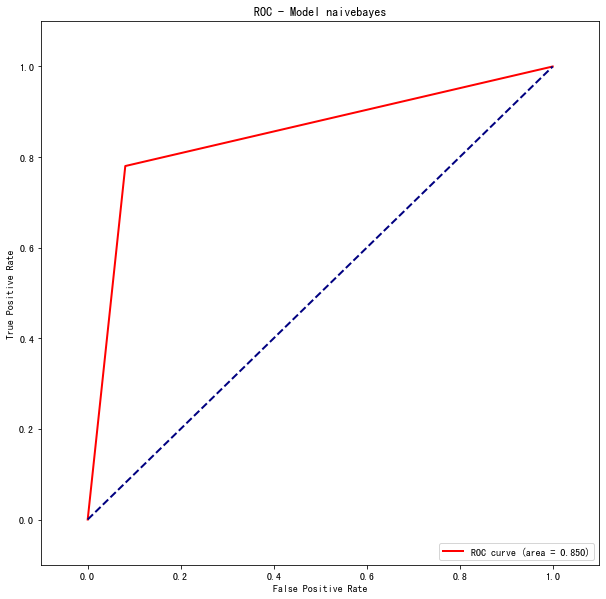

In [20]:
# 模型评估
# Оценка модели
y_predict = estimator.predict(X=x_test)

# 混淆矩阵
# Матрица запутанности
res_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
TP = res_matrix[0, 0]
FN = res_matrix[0, 1]
FP = res_matrix[1, 0]
TN = res_matrix[1, 1]
print('Metics: ', res_matrix)

# 准确率和召回率
# Точность и память
score_prec_recall_f1 = metrics.classification_report(y_true=y_test, y_pred=y_predict, labels=('y', 'n'), target_names=('Is spam', 'Not spam'))
print('准确率和召回率: \n', score_prec_recall_f1)

# FPR 和 TPR
# FPR и TPR
y_test_01 = np.where(y_test['yesno'] == 'y', 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test_01, y_score=np.where(y_predict == 'y', 1, 0))
score_auc = metrics.auc(x=fpr, y=tpr)
print('Score ROC: ', score_auc)

# 绘制 ROC 曲线
# Построение ROC-кривой
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % score_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Model naivebayes')
plt.legend(loc="lower right")
plt.show()

6.	Загрузите набор данных из файла bank_scoring_train.csv. Это набор финансовых данных, характеризующий физических лиц. Целевым столбцом является «SeriousDlqin2yrs», означающий, ухудшится ли финансовая ситуация у клиента. Постройте систему по принятию решения о выдаче или невыдаче кредита физическому лицу. Сделайте как минимум 2 варианта системы на основе различных классификаторов. Подберите подходящую метрику качества работы системы исходя из специфики задачи и определите, принятие решения какой системой сработало лучше на bank_scoring_test.csv.


从文件bank_scoring_train.csv中加载数据集。这是一组描述个人的财务数据。目标栏是 "SeriousDlqin2yrs"，意味着客户的财务状况是否会恶化。建立一个决定是否给予个人信贷的系统。根据不同的限定条件，至少制作2个版本的系统。根据任务的具体情况选择一个合适的系统性能指标，并确定哪个系统的决策在bank_scoring_test.csv上效果更好。

In [53]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 获取数据
# Получить данные
data = pd.read_csv(filepath_or_buffer='bank_scoring_train.csv', sep='\t')

# 数据预处理（转换为字典）
# Предварительная обработка данных (преобразование в словари)
data_x = data.iloc[:, 1:].to_dict(orient='records')
data_y = data.iloc[:, :1]

# 划分数据集
# Разделите набор данных
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=90102)

# 字典特征提取
# Извлечение признаков из словаря
transfer = DictVectorizer(sparse=True)
x_train = transfer.fit_transform(X=x_train)
x_test = transfer.transform(X=x_test)


<72162x10 sparse matrix of type '<class 'numpy.float64'>'
	with 721620 stored elements in Compressed Sparse Row format>

In [81]:
data_y.value_counts()

SeriousDlqin2yrs
0                   89592
1                    6624
dtype: int64

In [78]:
from matplotlib import pyplot as plt

def show_roc_curve(fpr, tpr, score_auc):
    # 绘制 ROC 曲线
    # Построение ROC-кривой
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='r',
            lw=lw, label='ROC curve (area = %0.3f)' % score_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Model naivebayes')
    plt.legend(loc="lower right")
    plt.show()

Score:  0.9339403009894405
混淆矩阵: 
 [[22389    51]
 [ 1538    76]]
准确率和召回率: 
               precision    recall  f1-score   support

         Bad       0.60      0.05      0.09      1614
        Good       0.94      1.00      0.97     22440

    accuracy                           0.93     24054
   macro avg       0.77      0.52      0.53     24054
weighted avg       0.91      0.93      0.91     24054

AUC score:  0.5224076264503774


<Figure size 432x288 with 0 Axes>

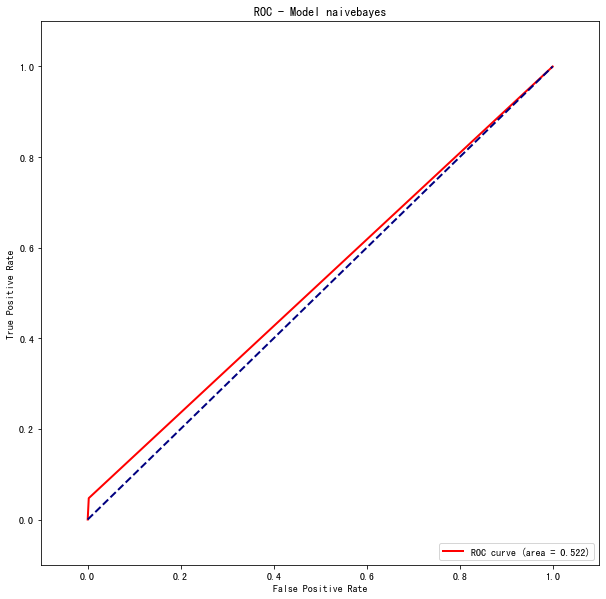

In [79]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
estimator = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=90102)
estimator.fit(X=x_train, y=y_train)
predict = estimator.predict(X=x_test)

# 预测的准确率
# Точность прогнозов
score = estimator.score(X=x_test, y=y_test)
print('Score: ', score)

# 混淆矩阵
# Матрица ошибок
res_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predict)
print('混淆矩阵: \n', res_matrix)

# 精确率、召回率、f1-score
# Точность, отзыв, f1-score
score_prec_recall_f1 = metrics.classification_report(y_true=y_test, y_pred=predict, labels=(1, 0), target_names=('Bad', 'Good'))
print('准确率和召回率: \n', score_prec_recall_f1)

# FPR TPR
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=predict)
score_auc = metrics.auc(x=fpr, y=tpr)
print('AUC score: ', score_auc)

# ROC
show_roc_curve(fpr=fpr, tpr=tpr, score_auc=score_auc)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=19)
Score:  0.9378897480668495
Confusion metrix: 
 [[22319   121]
 [ 1373   241]]
Precision, Recall, f1-scre:
               precision    recall  f1-score   support

         Bad       0.67      0.15      0.24      1614
        Good       0.94      0.99      0.97     22440

    accuracy                           0.94     24054
   macro avg       0.80      0.57      0.61     24054
weighted avg       0.92      0.94      0.92     24054

AUC score:  0.5719631532910562


<Figure size 432x288 with 0 Axes>

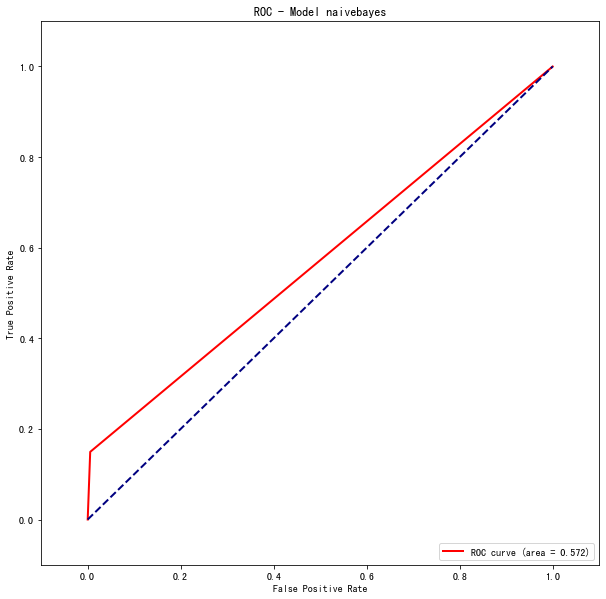

In [86]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

estimator = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_leaf': range(1, 21)
}
estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3)
estimator.fit(X=x_test, y=y_test)
predict = estimator.predict(X=x_test)
print(estimator.best_estimator_)

# 预测的准确率
# Точность прогнозов
score = estimator.score(X=x_test, y=y_test)
print('Score: ', score)

# 混淆矩阵
# Матрица ошибок
res_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predict)
print('Confusion metrix: \n', res_matrix)

# precision, Recall, f1-score
score_prec_recall_f1 = metrics.classification_report(y_true=y_test, y_pred=predict, labels=(1, 0), target_names=('Bad', 'Good'))
print('Precision, Recall, f1-scre:\n', score_prec_recall_f1)

# FPR, TPR, AUC
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=predict)
score_auc = metrics.auc(x=fpr, y=tpr)
print('AUC score: ', score_auc)
show_roc_curve(fpr=fpr, tpr=tpr, score_auc=score_auc)

Best estimator:  KNeighborsClassifier(n_neighbors=23)
Score:  0.9330672653196973
Confusion metrix: 
 [[22436     4]
 [ 1606     8]]
Precision, Recall, f1-scre:
               precision    recall  f1-score   support

         Bad       0.67      0.00      0.01      1614
        Good       0.93      1.00      0.97     22440

    accuracy                           0.93     24054
   macro avg       0.80      0.50      0.49     24054
weighted avg       0.92      0.93      0.90     24054

AUC score:  0.5023891881862579


<Figure size 432x288 with 0 Axes>

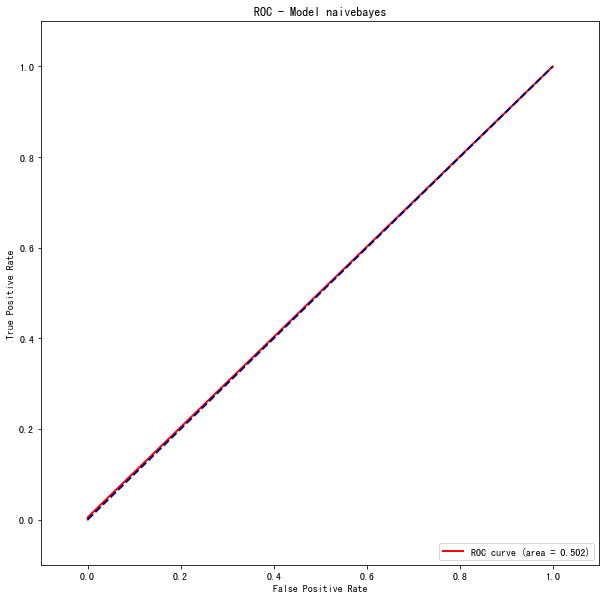

In [87]:
# KNN 算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': range(5, 50)
}
estimator = KNeighborsClassifier()
estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3)
estimator.fit(X=x_train, y=y_train)
predict = estimator.predict(X=x_test)
print('Best estimator: ', estimator.best_estimator_)


# 预测的准确率
# Точность прогнозов
score = estimator.score(X=x_test, y=y_test)
print('Score: ', score)

# 混淆矩阵
# Матрица ошибок
res_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predict)
print('Confusion metrix: \n', res_matrix)

# precision, Recall, f1-score
score_prec_recall_f1 = metrics.classification_report(y_true=y_test, y_pred=predict, labels=(1, 0), target_names=('Bad', 'Good'))
print('Precision, Recall, f1-scre:\n', score_prec_recall_f1)

# FPR, TPR, AUC
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=predict)
score_auc = metrics.auc(x=fpr, y=tpr)
print('AUC score: ', score_auc)
show_roc_curve(fpr=fpr, tpr=tpr, score_auc=score_auc)